<a href="https://colab.research.google.com/github/sherryqcchen/play-tensorflow/blob/master/tensorflow_play_MNIST_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST数据集， 将每张图的像素（28*28*) 数组展开成向量，长度是28*28=784.图片中的像素强度值介于0-1.

MNIST数据集是个形状为[60000,784]的张量。第一个维度是数字index。

MNIST labels 是介于0-9的数字。

softmax函数可以给不同的对象分配概率。

非线性回归的例子：

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

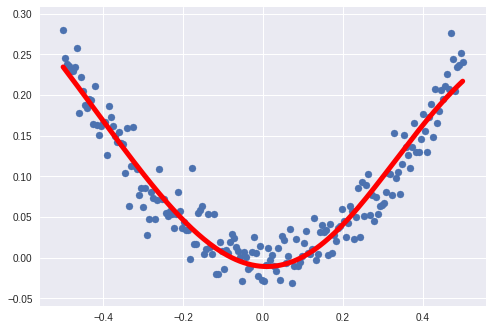

In [0]:
#numpy 生产200个随机点
x_data= np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)#生成随机值与x_data的形状一样
y_data= np.square(x_data) + noise

#定义placeholder
x = tf.placeholder(tf.float32, [None, 1]) 
y = tf.placeholder(tf.float32, [None, 1])

#构造神经网络

#定義中間層，總共10個神經元
Weights_L1 = tf.Variable(tf.random_normal([1, 10])) #定義權值變數，並且初始化為 normal 1*10
Biases_L1 = tf.Variable(tf.zeros([1,10])) #定義bias變數，並且初始化為0矩陣
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + Biases_L1  # Weights_L1*x + Biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1) #中間層的輸出 (激活函數為 雙曲正切函數)

#定義輸出層，總共1個神經元
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
Biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + Biases_L2  # Weights_L2*L1 + Biases_L2 (輸出層的輸入，是中間層的輸出L1)
prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代價函數 : loss = mean((y - prediction)^2)
loss = tf.reduce_mean(tf.square(y_data - prediction))

#梯度下降法训练  Gradient desent method  (learning rate = 0.1)
gd = tf.train.GradientDescentOptimizer(0.1)
#最小化 代價函數 (operator)
train = gd.minimize(loss)

#初始化變數 operator
init = tf.global_variables_initializer()

#開始training
with tf.Session() as sess:
    sess.run(init) #變數初始化
    feed_dict = {x : x_data, y : y_data} #訓練時 要傳入的 feed 的字典
    for _ in range(5000):
        sess.run(train, feed_dict)   
    #獲得預測值
    feed_pre_dict = {x : x_data} #觀察預測值時 要傳入的 feed 的字典
    pv = sess.run(prediction, feed_pre_dict) #預測值
    
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, pv, 'r-', lw=5)
    plt.show()

MNIST数据集分类-EASY

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


In [0]:
#載入數據集
mnist = input_data.read_data_sets("MNIST_data", one_hot = True) #這步有時候會失效,网络问题可能会影响

#因為數據集很大，故我們要用stochastic gradient descent，會將資料集分批次，並不會一次將所有資料拿來train (計算量很大)
#每一個批次的大小，自己定义
batch_size = 100 

#計算一共有多少批次
n_batch = mnist.train.num_examples // batch_size  # // 在python中表示取商

#定義兩個placeholder，目的在於 train時候透過 feed 傳入 x_data 與 y_data
x = tf.placeholder(tf.float32, [None, 784]) # 28 * 28 = 784
y = tf.placeholder(tf.float32, [None, 10]) #輸出層，有十個神經元，每個神經元有一個激活值，十個激活值排成一個 1*10的向量

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
#建立一個簡單的神經網路 (只有輸出層，總共10個神經元)
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([1, 10]))
prediction = tf.nn.softmax(tf.matmul(x, W) + b)

#二次代價函數 : loss = mean((y - prediction)^2)
loss = tf.reduce_mean(tf.square(y - prediction))

#Gradient desent method  (learning rate = 0.2)
gd = tf.train.GradientDescentOptimizer(0.2)

#最小化 代價函數 (operator)
train = gd.minimize(loss)

#初始化變數 operator
init = tf.global_variables_initializer()

#求准确率的方法：如果y標籤最大的值，與prediction標籤最大的值相等，則回傳true
#結果存在一個 boolean 的變數中
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1)) #argmax 回傳一維張量中最大的值，所在的位置

#求準確率
#轉換格式，boolean 轉成 float，接著在取平均值，得到准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

#開始training
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21): #總共疊代21次 (outer loop)，每个周期中加循环
        #每一次 outer loop 不一次拿所有的數據集，來做 Gradient desent，這就是 stochastic gradient descent
        for batch in range(n_batch): #每一個 outer loop 疊代 n_batch 個批次
            #利用 train.next_batch 函數，讀取一個batch的 x, y 存給 batch_xs, batch_ys
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) #每次获得100张图片，下一次获得101-200张图片...
            feed_dict = {x: batch_xs, y: batch_ys}  #拿來feed 的 dictionary
            sess.run(train, feed_dict)
        #每做完一次 outer loop 計算一次準確率
        outer_loop_feed_dict = {x: mnist.test.images, y: mnist.test.labels} #testing data feed dictionary
        acc = sess.run(accuracy, outer_loop_feed_dict)
        print("Iter =" + str(epoch) + ", Testing Accuracy =" + str(acc)) #打印周期数+准确率

Iter =0, Testing Accuracy =0.8319
Iter =1, Testing Accuracy =0.8707
Iter =2, Testing Accuracy =0.8829
Iter =3, Testing Accuracy =0.8879
Iter =4, Testing Accuracy =0.8945
Iter =5, Testing Accuracy =0.8977
Iter =6, Testing Accuracy =0.9
Iter =7, Testing Accuracy =0.9013
Iter =8, Testing Accuracy =0.9042
Iter =9, Testing Accuracy =0.9053
Iter =10, Testing Accuracy =0.9062
Iter =11, Testing Accuracy =0.9077
Iter =12, Testing Accuracy =0.9072
Iter =13, Testing Accuracy =0.9093
Iter =14, Testing Accuracy =0.9106
Iter =15, Testing Accuracy =0.9113
Iter =16, Testing Accuracy =0.9112
Iter =17, Testing Accuracy =0.9119
Iter =18, Testing Accuracy =0.9132
Iter =19, Testing Accuracy =0.9135
Iter =20, Testing Accuracy =0.9134


优化，提高准确率到95%：批次大小、增加隐藏层（神经元数量）、初始化方式、代价函数（使用交叉熵？）、优化方法（其他方式？）、训练次数（收敛效果）

交叉商loss 函數 (cross entropy loss function): 如果输出神经元是线性的，则二次代价函数是合适的选择；如果输出神经元是S型函数，则交叉熵函数比较适用。

In [0]:
#載入數據集
mnist = input_data.read_data_sets("MNIST_data", one_hot = True) 

#每一個批次的大小
batch_size = 100 

#計算一共有多少批次
n_batch = mnist.train.num_examples // batch_size 

#定義兩個placeholder，目的在於 train時候透過 feed 傳入 x_data 與 y_data
x = tf.placeholder(tf.float32, [None, 784]) 
y = tf.placeholder(tf.float32, [None, 10]) 

#建立一個神經網路
#隱藏層
W1 = tf.Variable(tf.random_normal([784, 15]))
b1 = tf.Variable(tf.zeros([1, 15]))
L1 = tf.nn.softmax(tf.matmul(x, W1) + b1) #隱藏層的輸出

#輸出層
W = tf.Variable(tf.zeros([15, 10]))
b = tf.Variable(tf.zeros([1, 10]))
prediction = tf.nn.softmax(tf.matmul(L1, W) + b)


#二次代價函數 : loss = mean((y - prediction)^2)
#loss = tf.reduce_mean(tf.square(y - prediction))

#交叉熵代价函数：
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = prediction))

#Gradient desent method 
gd = tf.train.AdagradOptimizer(0.31)
#gd = tf.train.GradientDescentOptimizer(0.2)

#最小化 代價函數 (operator) 
train = gd.minimize(loss)

#初始化變數 operator
init = tf.global_variables_initializer()


#結果存在一個 boolean 的變數中
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1)) #argmax 回傳一維張量中最大的值，所在的位置

#求準確率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

#開始training
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(300): 
       
        for batch in range(n_batch): #每一個 outer loop 疊代 n_batch 個批次

            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {x: batch_xs, y: batch_ys} 
            sess.run(train, feed_dict)
        if epoch % 20 == 0:
            #計算一次準確率
            outer_loop_feed_dict = {x: mnist.test.images, y: mnist.test.labels} #testing data feed dictionary
            acc = sess.run(accuracy, outer_loop_feed_dict)
            print("Iter=" + str(epoch) + ", Testing Accuracy=" + str(acc))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Iter=0, Testing Accuracy=0.3469
Iter=20, Testing Accuracy=0.6612
Iter=40, Testing Accuracy=0.7406
Iter=60, Testing Accuracy=0.8244
Iter=80, Testing Accuracy=0.8304
Iter=100, Testing Accuracy=0.8319
Iter=120, Testing Accuracy=0.8323
Iter=140, Testing Accuracy=0.8337
Iter=160, Testing Accuracy=0.8344
Iter=180, Testing Accuracy=0.8354
Iter=200, Testing Accuracy=0.8354
Iter=220, Testing Accuracy=0.8358
Iter=240, Testing Accuracy=0.8359
Iter=260, Testing Accuracy=0.8356
Iter=280, Testing Accuracy=0.8355


Dropout：在訓練神經網路的時候，對於不一樣的訓練樣本，遮蔽隱藏層的一些神經元，可以減低 overfitting 的可能
以下是一個沒有 Dropout的例子 (keep_prob = 1.0)， Training Accuracy 比 Test Accuracy 準確許多
也就是說，這個神經網路已經 Overfitting。
使用后Dropout后，准确率收敛速度变慢，避免出现过拟合的情况。

此Case中，还改变成为AdagradOptimizer

In [0]:
#載入數據集
mnist = input_data.read_data_sets("MNIST_data", one_hot = True) 

#每一個批次的大小
batch_size = 100 

#計算一共有多少批次
n_batch = mnist.train.num_examples // batch_size 

#定義兩個placeholder，目的在於 train時候透過 feed 傳入 x_data 與 y_data
x = tf.placeholder(tf.float32, [None, 784]) 
y = tf.placeholder(tf.float32, [None, 10]) 
keep_prob = tf.placeholder(tf.float32) #用來 dropout 的機率

#建立一個神經網路

#增加隐藏层，可能出现过拟合。
#隱藏層1
W1 = tf.Variable(tf.truncated_normal([784, 2000], stddev=0.1))
b1 = tf.Variable(tf.zeros([2000]))
L1 = tf.nn.tanh(tf.matmul(x, W1) + b1)
L1_dropout = tf.nn.dropout(L1, keep_prob)


#隱藏層2
W2 = tf.Variable(tf.truncated_normal([2000, 2000], stddev=0.1))
b2 = tf.Variable(tf.zeros([2000]))
L2 = tf.nn.tanh(tf.matmul(L1_dropout, W2) + b2)
L2_dropout = tf.nn.dropout(L2, keep_prob)

#隱藏層3
W3 = tf.Variable(tf.truncated_normal([2000, 1000], stddev=0.1))
b3 = tf.Variable(tf.zeros([1000]))
L3 = tf.nn.tanh(tf.matmul(L2_dropout, W3) + b3)
L3_dropout = tf.nn.dropout(L3, keep_prob)

#輸出層
W4 = tf.Variable(tf.truncated_normal([1000, 10], stddev=0.1))
b4 = tf.Variable(tf.zeros([10]))
prediction = tf.nn.tanh(tf.matmul(L3_dropout, W4) + b4)

#代價函數 : loss = mean((y - prediction)^2)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = prediction))

#Gradient desent method 
gd = tf.train.AdagradOptimizer(0.31)
#gd = tf.train.GradientDescentOptimizer(0.2)

#最小化 代價函數 (operator)
train = gd.minimize(loss)

#初始化變數 operator
init = tf.global_variables_initializer()


#結果存在一個 boolean 的變數中
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1)) #argmax 回傳一維張量中最大的值，所在的位置

#求準確率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

#開始training
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21): 
       
        for batch in range(n_batch): #每一個 outer loop 疊代 n_batch 個批次

            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {x: batch_xs, y: batch_ys, keep_prob: 0.7} 
            sess.run(train, feed_dict)
        #計算一次準確率
        train_feed_dict = {x: mnist.train.images, y: mnist.train.labels, keep_prob: 1.0} #train data feed dictionary
        train_acc = sess.run(accuracy, train_feed_dict)
        test_feed_dict = {x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0} #testing data feed dictionary
        test_acc = sess.run(accuracy, test_feed_dict)          
        print("Iter=" + str(epoch) + ", Training Accuracy=" + str(train_acc) + ", Testing Accuracy=" + str(test_acc))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Iter=0, Training Accuracy=0.9212546, Testing Accuracy=0.9195
Iter=1, Training Accuracy=0.9521818, Testing Accuracy=0.9508
Iter=2, Training Accuracy=0.95870906, Testing Accuracy=0.9554
Iter=3, Training Accuracy=0.9609454, Testing Accuracy=0.9543
Iter=4, Training Accuracy=0.9699636, Testing Accuracy=0.9626
Iter=5, Training Accuracy=0.95247275, Testing Accuracy=0.9425
Iter=6, Training Accuracy=0.9742727, Testing Accuracy=0.965
Iter=7, Training Accuracy=0.9753818, Testing Accuracy=0.9644
Iter=8, Training Accuracy=0.9725636, Testing Accuracy=0.9647
Iter=9, Training Accuracy=0.9825636, Testing Accuracy=0.9721
Iter=10, Training Accuracy=0.9805818, Testing Accuracy=0.9694
Iter=11, Training Accuracy=0.98047274, Testing Accuracy=0.9685
Iter=12, Training Accuracy=0.9848, Testing Accuracy=0.9721
Iter=13, Tr

KeyboardInterrupt: ignored

Opimizer: 调节成 Adam Optimizer

In [0]:
#載入數據集
mnist = input_data.read_data_sets("MNIST_data", one_hot = True) 

#每一個批次的大小
batch_size = 100 

#計算一共有多少批次
n_batch = mnist.train.num_examples // batch_size 

#定義兩個placeholder，目的在於 train時候透過 feed 傳入 x_data 與 y_data
x = tf.placeholder(tf.float32, [None, 784]) 
y = tf.placeholder(tf.float32, [None, 10]) 

#建立一個神經網路

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x, W) + b)


#二次代價函數 : loss = mean((y - prediction)^2)
#loss = tf.reduce_mean(tf.square(y - prediction))

#交叉熵代价函数：
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = prediction))

#Gradient desent method 
gd = tf.train.AdamOptimizer(1e-2)
#gd = tf.train.GradientDescentOptimizer(0.2)
#最小化 代價函數 (operator) 
train = gd.minimize(loss)

#初始化變數 operator
init = tf.global_variables_initializer()


#結果存在一個 boolean 的變數中
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1)) #argmax 回傳一維張量中最大的值，所在的位置

#求準確率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

#開始training
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21): 
        for batch in range(n_batch): #每一個 outer loop 疊代 n_batch 個批次
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {x: batch_xs, y: batch_ys} 
            sess.run(train, feed_dict)
        outer_loop_feed_dict = {x: mnist.test.images, y: mnist.test.labels} #testing data feed dictionary
        acc = sess.run(accuracy, outer_loop_feed_dict)
        print("Iter=" + str(epoch) + ", Testing Accuracy=" + str(acc))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Iter=0, Testing Accuracy=0.9204
Iter=1, Testing Accuracy=0.928
Iter=2, Testing Accuracy=0.9288
Iter=3, Testing Accuracy=0.929
Iter=4, Testing Accuracy=0.93
Iter=5, Testing Accuracy=0.9318
Iter=6, Testing Accuracy=0.929
Iter=7, Testing Accuracy=0.9298
Iter=8, Testing Accuracy=0.931
Iter=9, Testing Accuracy=0.9321
Iter=10, Testing Accuracy=0.9307
Iter=11, Testing Accuracy=0.9283
Iter=12, Testing Accuracy=0.9304
Iter=13, Testing Accuracy=0.9307
Iter=14, Testing Accuracy=0.9311
Iter=15, Testing Accuracy=0.9299
Iter=16, Testing Accuracy=0.9292
Iter=17, Testing Accuracy=0.9311
Iter=18, Testing Accuracy=0.9291
Iter=19, Testing Accuracy=0.9308
Iter=20, Testing Accuracy=0.9323


Tensorboard 使用方法介绍

In [0]:
#載入數據集
mnist = input_data.read_data_sets("MNIST_data", one_hot = True) 

#每一個批次的大小
batch_size = 100 

#計算一共有多少批次
n_batch = mnist.train.num_examples // batch_size 

#命名空间
with tf.name_scope('input'):
    #定義兩個placeholder，目的在於 train時候透過 feed 傳入 x_data 與 y_data
    x = tf.placeholder(tf.float32, [None, 784],name='x-input') 
    y = tf.placeholder(tf.float32, [None, 10],name='y-input') 

#建立一個神經網路

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x, W) + b)


#二次代價函數 : loss = mean((y - prediction)^2)
#loss = tf.reduce_mean(tf.square(y - prediction))

#交叉熵代价函数：
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = prediction))

#Gradient desent method 
gd = tf.train.AdamOptimizer(1e-2)
#gd = tf.train.GradientDescentOptimizer(0.2)
#最小化 代價函數 (operator) 
train = gd.minimize(loss)

#初始化變數 operator
init = tf.global_variables_initializer()


#結果存在一個 boolean 的變數中
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1)) #argmax 回傳一維張量中最大的值，所在的位置

#求準確率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

#開始training
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('logs/',sess.graph)
    for epoch in range(1): 
        for batch in range(n_batch): #每一個 outer loop 疊代 n_batch 個批次
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {x: batch_xs, y: batch_ys} 
            sess.run(train, feed_dict)
        outer_loop_feed_dict = {x: mnist.test.images, y: mnist.test.labels} #testing data feed dictionary
        acc = sess.run(accuracy, outer_loop_feed_dict)
        print("Iter=" + str(epoch) + ", Testing Accuracy=" + str(acc))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Iter=0, Testing Accuracy=0.9186


https://stackoverflow.com/questions/47818822/can-i-use-tensorboard-with-google-colab
**在colab使用tensorboard的方法：**

In [0]:
!pip install tensorboardcolab
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback


tbc = TensorBoardColab()
summary_writer = tbc.get_writer()

Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
https://47c63a14.ngrok.io
